In [10]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy.interpolate import interp1d

In [20]:

def slide_func(data, window_size, iter):
    if iter >= window_size:
        if iter % (1 * 512) == 0:
            sliding_window_start = iter - window_size
            sliding_window_end = iter
            sliding_window = np.array(data[sliding_window_start:sliding_window_end])  # sliding_window ~ y
            return sliding_window
        return None
    return None

def filter_data(data):
    # Bandpass filter
    band = [0.5 / (0.5 * 512), 40 / (0.5 * 512)]
    b, a = sp.signal.butter(4, band, btype='band', analog=False, output='ba')
    data = sp.signal.lfilter(b, a, data)

    # Filter for EMG by interpolated
    filtered_data = data[(np.abs(data) <= 256)]
    x = np.arange(len(filtered_data))
    interpolated_data = interp1d(x, filtered_data)(np.linspace(0, len(filtered_data) - 1, len(data)))
    return interpolated_data

def hjorth_parameters(signal):
    diff1 = np.diff(signal) # Tính đạo hàm bậc nhất
    diff2 = np.diff(diff1)  # Tính đạo hàm bậc hai

    activity = np.var(signal)      # Activity (A)
    mobility = np.sqrt(np.var(diff1) / activity)  # Mobility (B)
    complexity = np.sqrt(np.var(diff2) / np.var(diff1)) / mobility  # Complexity (C)

    return activity, mobility, complexity

def FeatureExtract(data, number):
    f, t, Zxx = sp.signal.stft(data, 512, nperseg=15 * 512, noverlap=14 * 512)
    delta = np.array([], dtype=float)
    theta = np.array([], dtype=float)
    alpha = np.array([], dtype=float)
    beta = np.array([], dtype=float)

    for i in range(0, int(t[-1])):
        indices = np.where((f >= 0.5) & (f <= 4))[0]
        delta = np.append(delta, np.sum(np.abs(Zxx[indices, i])))

        indices = np.where((f >= 4) & (f <= 8))[0]
        theta = np.append(theta, np.sum(np.abs(Zxx[indices, i])))

        indices = np.where((f >= 8) & (f <= 13))[0]
        alpha = np.append(alpha, np.sum(np.abs(Zxx[indices, i])))

        indices = np.where((f >= 13) & (f <= 30))[0]
        beta = np.append(beta, np.sum(np.abs(Zxx[indices, i])))

    abr = alpha / beta
    tbr = theta / beta
    dbr = delta / beta
    tar = theta / alpha
    dar = delta / alpha
    dtabr = (alpha + beta) / (delta + theta)

    diction = {
        "delta": delta,
        "theta": theta,
        "alpha": alpha,
        "beta": beta,
        "abr": abr,
        "tbr": tbr,
        "dbr": dbr,
        "tar": tar,
        "dar": dar,
        "dtabr": dtabr,
        "label": number
    }

    return diction

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)



In [68]:
import os
folder_path = '../Data'

task1_data = []
task2_data = []
task3_data = []
task4_data = []
task5_data = []

print(os.listdir(folder_path))

for dir in os.listdir(folder_path)[1:]:
    subject_path = os.path.join(folder_path, dir)

    for filename in os.listdir(subject_path):
        # Kiểm tra nếu là file .txt
        if filename.endswith(".txt"):
            # Đọc dữ liệu từ file
            file_data = np.loadtxt(os.path.join(subject_path, filename))

        match filename[:-4]:
            case "task1": 
                task1_data.append(file_data)
            case "task2":
                task2_data.append(file_data)
            case "task3":
                task3_data.append(file_data)
            case "task4":
                task4_data.append(file_data)
            case "task5":
                task5_data.append(file_data)
            case _:
                print("file name is not correct!")
            # print(filename)
        

# task1_data = np.concatenate(task1_data, axis = 0)
task2_data = np.concatenate(task2_data, axis = 0)
task3_data = np.concatenate(task3_data, axis = 0)
task4_data = np.concatenate(task4_data, axis = 0)
task5_data = np.concatenate(task5_data, axis = 0)

# print(task1_data.shape)
print(task2_data.shape)
print(task3_data.shape)
print(task4_data.shape)
print(task5_data.shape)



['.DS_Store', 'Thanh2', 'Dat2', 'Thanh1', 'Dat1']
(61440,)
(61440,)
(61440,)
(61440,)


In [82]:
# Task1 = filter_data(task1_data)
Task2 = filter_data(task2_data)
Task3 = filter_data(task4_data)
Task4 = filter_data(task3_data)
Task5 = filter_data(task5_data)


# Extract features
# task1_features = FeatureExtract(Task1, 0)
task2_features = FeatureExtract(Task2, 0)
task3_features = FeatureExtract(Task3, 1)
task4_features = FeatureExtract(Task4, 2)
task5_features = FeatureExtract(Task5, 3)


# Save features to CSV
# save_to_csv(task1_features, '../Data/CSV/Task1.csv')
save_to_csv(task2_features, '../CSV/Task2.csv')
save_to_csv(task3_features, '../CSV/Task3.csv')
save_to_csv(task4_features, '../CSV/Task4.csv')
save_to_csv(task5_features, '../CSV/Task5.csv')

print("EEG features saved to csv")

EEG features saved to csv


In [83]:
# Task1 = pd.read_csv('../CSV/Task1.csv')
Task2 = pd.read_csv('../CSV/Task2.csv')
Task3 = pd.read_csv('../CSV/Task3.csv')
Task4 = pd.read_csv('../CSV/Task4.csv')
Task5 = pd.read_csv('../CSV/Task5.csv')


# print(Task1.shape)
print(Task2.shape)
print(Task3.shape)
print(Task4.shape)
print(Task5.shape)



(120, 11)
(120, 11)
(120, 11)
(120, 11)


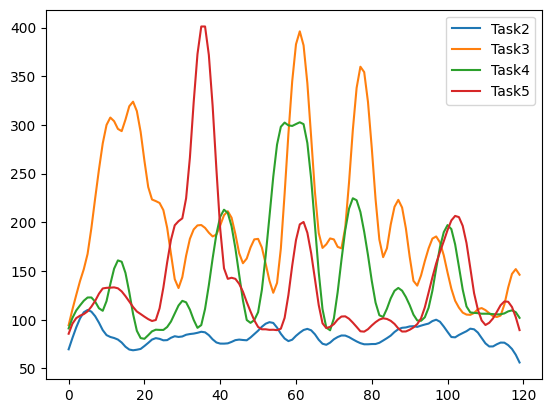

In [84]:
import matplotlib.pyplot as plt

# Giả sử Task1, Task2, Task3, Task4, Task5 là các DataFrame hoặc Series có cột 'delta'

# plt.plot(Task1['delta'], label='Task1')
plt.plot(Task2['delta'], label='Task2')
plt.plot(Task3['delta'], label='Task3')
plt.plot(Task4['delta'], label='Task4')
plt.plot(Task5['delta'], label='Task5')

# Thêm chú thích vào biểu đồ
plt.legend()

# Hiển thị biểu đồ
plt.show()


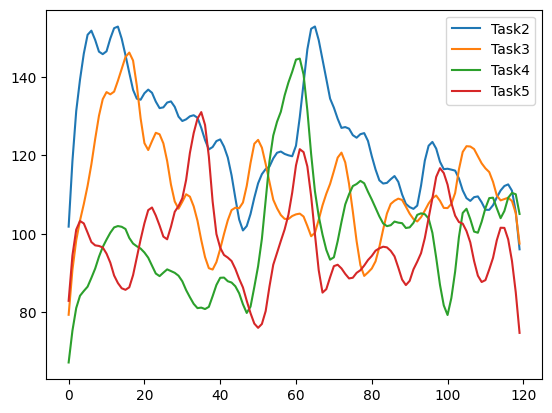

In [85]:
# plt.plot(Task1['alpha'], label='Task1')
plt.plot(Task2['alpha'], label='Task2')
plt.plot(Task3['alpha'], label='Task3')
plt.plot(Task4['alpha'], label='Task4')
plt.plot(Task5['alpha'], label='Task5')
plt.legend()

plt.show()

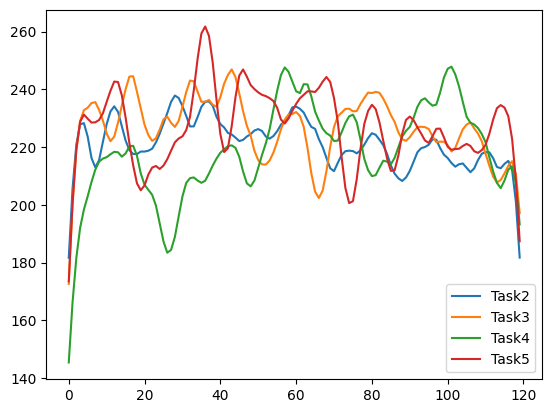

In [86]:
# plt.plot(Task1['beta'], label='Task1')
plt.plot(Task2['beta'], label='Task2')
plt.plot(Task3['beta'], label='Task3')
plt.plot(Task4['beta'], label='Task4')
plt.plot(Task5['beta'], label='Task5')

plt.legend()

plt.show()

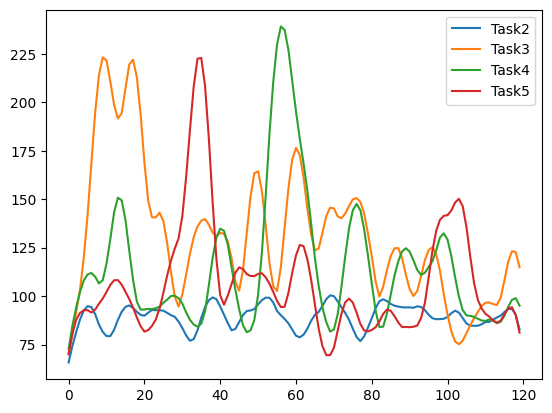

In [87]:
# plt.plot(Task1['theta'], label='Task1')
plt.plot(Task2['theta'], label='Task2')
plt.plot(Task3['theta'], label='Task3')
plt.plot(Task4['theta'], label='Task4')
plt.plot(Task5['theta'], label='Task5')
plt.legend()

plt.show()

In [88]:
def df_to_X_y(df, window_size=15):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a[:-1]] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][-1]
    y.append(label)
  return np.array(X), np.array(y)

# feature_task1, label_task2 = df_to_X_y(Task1)
feature_task2, label_task2 = df_to_X_y(Task2)
feature_task3, label_task3 = df_to_X_y(Task3)
feature_task4, label_task4 = df_to_X_y(Task4)
feature_task5, label_task5 = df_to_X_y(Task5)


# feature_task1 = np.squeeze(feature_task1)
feature_task2 = np.squeeze(feature_task2)
feature_task3 = np.squeeze(feature_task3)
feature_task4 = np.squeeze(feature_task4)
feature_task5 = np.squeeze(feature_task5)



In [89]:
print(feature_task2[1])


[[ 81.21804473  74.36195699 118.54391397 205.7208902    0.57623664
    0.36147013   0.39479726   0.6272946    0.68513045   2.08423191]
 [ 92.06483129  81.52708102 131.28012779 220.9121766    0.59426388
    0.36904748   0.41674856   0.62101616   0.70128536   2.02885203]
 [101.31565291  87.90168451 139.28648376 227.89679668   0.61118228
    0.38570829   0.44456813   0.63108553   0.72739041   1.94053719]
 [107.61970107  92.61439318 145.8961243  228.28113054   0.63910724
    0.40570324   0.47143494   0.6347968    0.73764606   1.86869902]
 [109.98263219  94.84578755 150.69936992 223.58380667   0.67401737
    0.42420687   0.49190786   0.62937083   0.72981481   1.827301  ]
 [108.29984308  94.36037132 151.74599202 216.22755134   0.70178842
    0.43639384   0.50086052   0.62183106   0.71369162   1.81571674]
 [103.6066117   90.688686   149.39292631 212.98251264   0.70143283
    0.42580344   0.48645596   0.60704806   0.69351752   1.8650757 ]
 [ 96.95844287  85.33518761 146.40761542 215.44380551  

In [90]:
features = np.vstack((feature_task2, feature_task3, feature_task4, feature_task5))
labels = np.concatenate((label_task2, label_task3, label_task4, label_task5))
print(features.shape)
print(labels.shape)

(420, 15, 10)
(420,)


In [91]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

from keras.models import Sequential, Model
# from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, MultiHeadAttention, Input, DepthwiseConv2D, LSTM, Bidirectional,Embedding, Input,GlobalAveragePooling2D,GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, GRU
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

batch_size = 32
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
data_train = data_train.repeat(10).batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE).shuffle(buffer_size=500)
data_test = data_test.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

print(X_train[1])

2.16.1
[[219.87483758 143.09294079 125.36806186 226.0303427    0.55465147
    0.63306961   0.97276691   1.14138273   1.75383454   0.96812562]
 [212.50306321 138.63923719 123.05223686 229.60381443   0.53593289
    0.6038194    0.92552061   1.12666978   1.72693377   1.00431093]
 [194.39204303 127.43655728 118.5594761  230.52915165   0.51429277
    0.55280018   0.84324278   1.0748745    1.63961625   1.08470356]
 [167.64937207 112.51153757 112.57473821 228.41316093   0.49285574
    0.49257905   0.73397422   0.99943859   1.48922729   1.21711448]
 [141.64652198  99.76234062 108.24804967 226.9779277    0.47691003
    0.43952441   0.62405417   0.92160867   1.30853648   1.38862332]
 [132.52724084  94.61301875 106.42446431 229.03933819   0.46465583
    0.41308633   0.57862218   0.88901569   1.24527045   1.47690155]
 [143.75159333 100.83801408 108.17911571 233.93467402   0.46243301
    0.43105202   0.6144946    0.93213938   1.32882944   1.39872578]
 [165.69698658 110.99551579 110.09524223 239.053

In [92]:
weight_decay = 0.001
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(15, 10), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 15, 64)         │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,844 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,548 (17.77 KB)

 Trainable params: 4,548 (17.77 KB)

 Non-trainable params: 0 (0.00 B)

None


In [93]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

model.fit(data_train, validation_data=data_test, epochs=10)



Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.4700 - loss: 9.2286 - val_accuracy: 0.6270 - val_loss: 3.2858
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.6930 - loss: 1.9652 - val_accuracy: 0.7063 - val_loss: 1.3940
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7715 - loss: 1.0310 - val_accuracy: 0.7143 - val_loss: 0.9752
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8482 - loss: 0.5109 - val_accuracy: 0.8016 - val_loss: 0.9145
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8776 - loss: 0.3421 - val_accuracy: 0.8095 - val_loss: 0.6292
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8676 - loss: 0.4271 - val_accuracy: 0.8095 - val_loss: 0.9249
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.8629 - loss: 0.4704 - val_accuracy: 0.8095 - val_loss: 0.6356
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9200 - loss: 0.2283 - val_accuracy: 0.

In [94]:
loss_train, acc_train = model.evaluate(data_train)
loss_test, acc_test = model.evaluate(data_test)
print("Train results: ", acc_train)
print("Test results: ", acc_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8956 - loss: 0.2833
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8593 - loss: 0.5521
Train results:  0.8945578336715698
Test results:  0.8253968358039856


In [95]:
train_predictions = model.predict(X_test)
train_predictions_labels = np.argmax(train_predictions, axis=1)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions_labels, 'Actuals':y_test})
train_results

print(np.argmax(model.predict(features[1:3]), axis = 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[0 0]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.65      0.78        31
           2       0.60      0.91      0.72        32
           3       0.88      0.74      0.81        31

    accuracy                           0.83       126
   macro avg       0.87      0.82      0.83       126
weighted avg       0.87      0.83      0.83       126



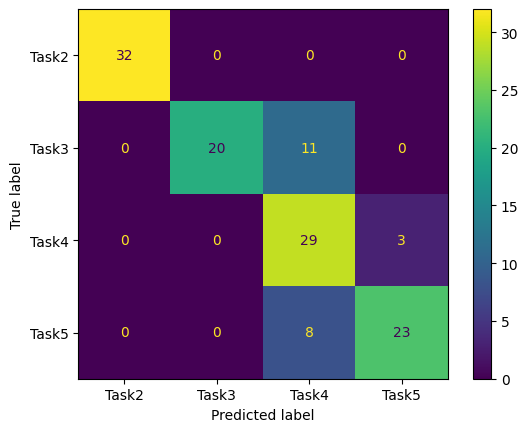

In [99]:
# Make predictions on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



# Print classification report
print(classification_report(y_test, train_predictions_labels, labels=[0, 1,2,3]))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, train_predictions_labels), display_labels=["Task2", "Task3", "Task4", "Task5"])
disp.plot()

plt.show()


In [77]:
import pickle
pickle.dump(model, open("../trained_model/ANN.h5", "wb"))

# pickle.dump(model, open("/Users/nguyentrithanh/Downloads/OneDrive_1_29-5-2024/ZZZZZ/trained_model/ANN.h5", "wb"))
